In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family = font_name)
import seaborn as sns

import warnings
warnings.filterwarnings(action = "ignore", category = FutureWarning)

from scipy.optimize import curve_fit

In [3]:
data = pd.read_csv('data/서울특별시_부동산_면적당_가격_평균_2006-2020년.csv')

In [23]:
data = data[data['신고년도'] != 2006]
data = data.set_index('자치구명').reset_index()
data

,자치구명,신고년도,면적당 가격
0,강남구,2007,6.582144e+06
1,강남구,2008,7.443532e+06
2,강남구,2009,9.697053e+06
3,강남구,2010,9.105927e+06
4,강남구,2011,9.246117e+06
...,...,...,...
345,중랑구,2016,4.416302e+06
346,중랑구,2017,4.673076e+06
347,중랑구,2018,5.011856e+06
348,중랑구,2019,5.756296e+06


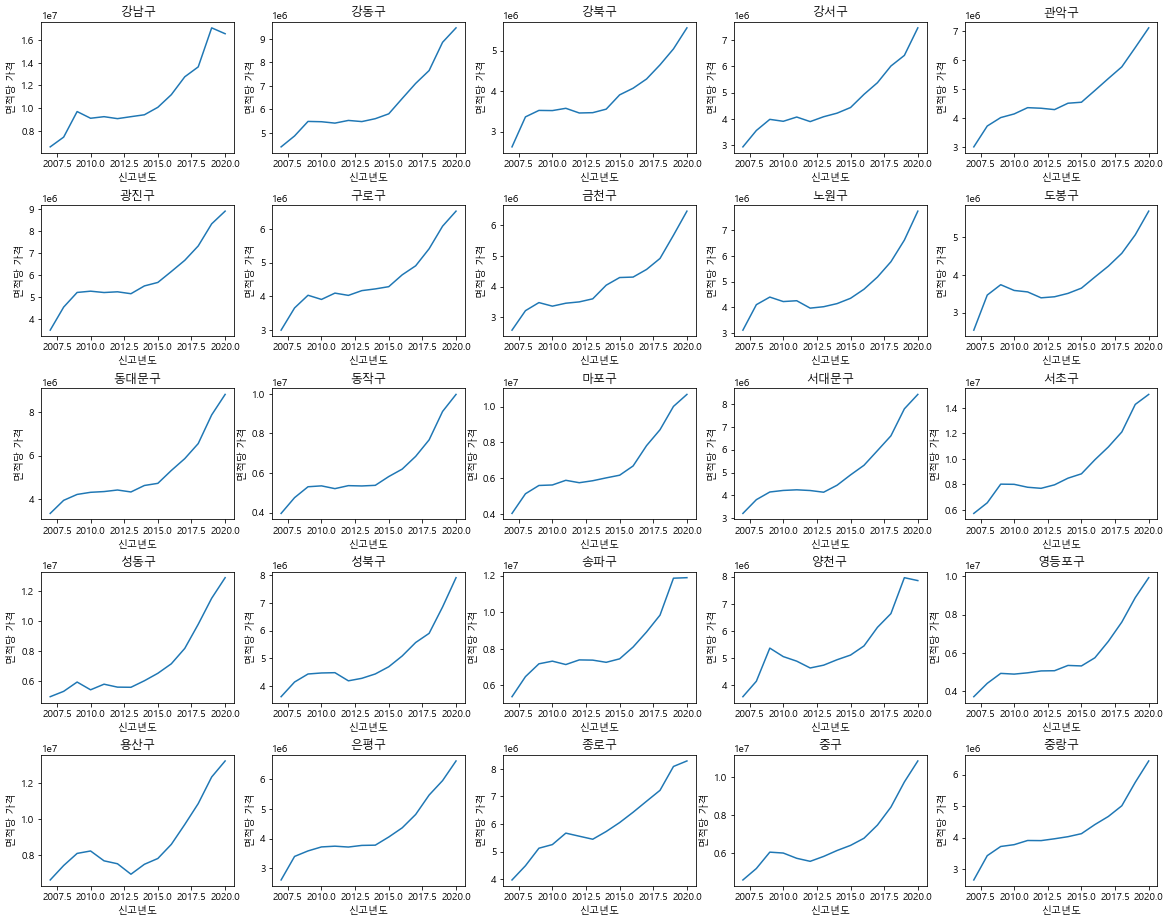

In [6]:
f, ax = plt.subplots(5, 5, figsize=(20, 15))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

cols = list(data['자치구명'].unique())

for i in range(len(cols)):
    sns.lineplot('신고년도', '면적당 가격',
                data=data.loc[data['자치구명'] == cols[i]],
                ax = ax[i//5, i%5])
    ax[i//5, i%5].set_title(cols[i])

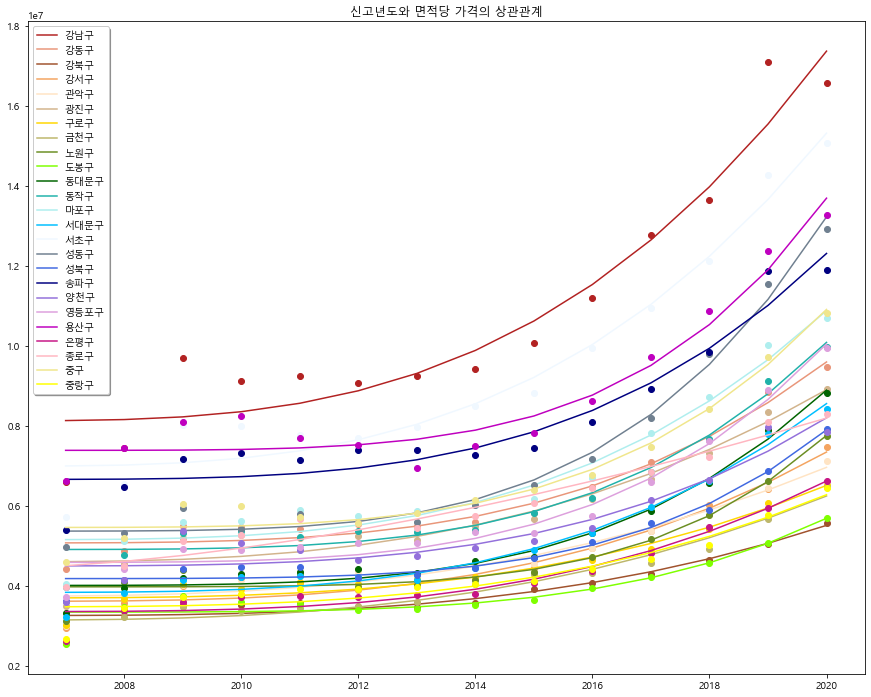

In [7]:
def x_func(x, a, b, c):
    y = a*np.power(x-2006, b) + c
    return y

cols = list(data['자치구명'].unique())
colors = ['firebrick', 'darksalmon', 'sienna', 'sandybrown', 'bisque',
         'tan', 'gold', 'darkkhaki', 'olivedrab', 'chartreuse',
          'darkgreen', 'lightseagreen', 'paleturquoise', 'deepskyblue', 'aliceblue',
          'slategray', 'royalblue', 'navy', 'mediumpurple', 'plum',
         'm', 'mediumvioletred', 'lightpink', 'khaki', 'yellow']

fits = []

plt.figure(figsize=(15, 12))
for i in range(len(cols)):
    parameters, covariance = curve_fit(x_func,
                                       data[data['자치구명'] == cols[i]]['신고년도'],
                                      data[data['자치구명'] == cols[i]]['면적당 가격'])
    fit_a = parameters[0]
    fit_b = parameters[1]
    fit_c = parameters[2]
    fits.append([fit_a, fit_b, fit_c])
    
    fit_x = x_func(data[data['자치구명'] == cols[i]]['신고년도'],
                  fit_a, fit_b, fit_c)
    
    plt.plot(data[data['자치구명'] == cols[i]]['신고년도'],
            data[data['자치구명'] == cols[i]]['면적당 가격'],
             'o', color=colors[i])
    plt.plot(data[data['자치구명'] == cols[i]]['신고년도'],
            fit_x, '-', label=cols[i], color=colors[i])

plt.title('신고년도와 면적당 가격의 상관관계')
plt.legend(shadow=True, fancybox=True, loc='best')

In [15]:
cols = list(data['자치구명'].unique())
for i in range(len(fits)):
    print(cols[i], '->\tfit_a :', fits[i][0], '\tfit_b :', fits[i][1], '\tfit_c', fits[i][2])

강남구 ->	fit_a : 3679.871411166481 	fit_b : 2.966321027646558 	fit_c 8122433.905946602
강동구 ->	fit_a : 526.4640595514143 	fit_b : 3.432478335823713 	fit_c 5067859.852056046
강북구 ->	fit_a : 829.5542684503422 	fit_b : 2.9960810795071935 	fit_c 3253418.244783642
강서구 ->	fit_a : 1147.6988034888595 	fit_b : 3.0641875161049112 	fit_c 3608858.348076838
관악구 ->	fit_a : 3290.2654315675877 	fit_b : 2.6092351664595714 	fit_c 3737347.2500675865
광진구 ->	fit_a : 2929.5320195916947 	fit_b : 2.7630954655518316 	fit_c 4595852.36761978
구로구 ->	fit_a : 1007.6876170652669 	fit_b : 3.006335514739337 	fit_c 3692762.5447017485
금천구 ->	fit_a : 2779.2736521155934 	fit_b : 2.658950111827674 	fit_c 3140121.64251576
노원구 ->	fit_a : 9.415117950340461 	fit_b : 4.889498671203871 	fit_c 3970524.785051937
도봉구 ->	fit_a : 38.93508866609398 	fit_b : 4.170369902935234 	fit_c 3338128.742140044
동대문구 ->	fit_a : 166.36393131836212 	fit_b : 3.897955922541373 	fit_c 4005002.235216483
동작구 ->	fit_a : 202.59172556260802 	fit_b : 3.845504411